In [9]:
#import libraries
import numpy as np
import pandas as pd
from numpy import random
import matplotlib as plt

In [19]:
#Set up pop state variables
Nt = 1000 #how many people in the population?
t_end = 90 #how many iterations do you want to run (one iteration assumed to be one day)

inf_s = 1     #how many infected ppl in pop at the start?
imm_s = 0     #how much immunity is there in the population? 
emax = 5     #max number of people encountered in a day

Pr = 0.0005 #probability of recovering in one day
Pd = 0.02 #probability of dying

output = pd.DataFrame(np.empty(shape=(t_end,4),dtype='object'),columns=list('SIRD'))

In [20]:
pop = [] #empty list
for person in range(0,Nt):
    pop.append({'sus':1,'inf':False,'inf days':0,'alive':True})

istart = int(random.randint(0,len(pop),inf_s,int))

pop[istart]['inf'] = True    #make a random person in pop infected
pop[istart]['inf days'] += 1 #Update their 'days infected' counter to reflect one day of infection

imm_start = random.choice(range(0,len(pop)),imm_s,replace=False) #adds immune people to the population if applicable
for imm in imm_start:
    pop[imm]['sus'] = 0 #make <imm_s> # of random people in pop not suseptible

In [21]:
sus_tot = 0
for n in range(0,len(pop)):
    if pop[n]['sus'] and not pop[n]['inf']:
        sus_tot += 1
        
output.loc[0,'S'] = sus_tot
output.loc[0,'I'] = inf_s
output.loc[0,'R'] = 0
output.loc[:,'D'] = 0 
#note: if you've added immue ppl to the population, then the SIRD total will be less than Nt by the # of immue ppl

In [22]:
rec_tot = 0
dead_tot = 0

for t in range(0,t_end):
    for i in range(0,len(pop)):
        e = int(random.randint(0,emax,1,int)) #how many people did you encounter? (from 0 to <emax> ppl)
        en = random.randint(0,len(pop),e,int) #which people did you encounter?
    
        for a in range(0,len(en)):
            if not pop[en[a]]['alive']:
                #if you "encounter" a dead person, need a diff encounter
                en_alt = en[a]
                while not pop[en_alt]['alive']: #if you're still meeting dead ppl
                       en_alt = int(random.randint(0,len(pop),1,int)) #pick a new person to meet
                en[a] = en_alt
        
        for k in en:
            if pop[k]['inf'] and random.random() < 0.2 and pop[i]['sus']:
                pop[i]['inf']=True #welp, now you're sick
                pop[i]['inf days'] = 1
        
        if pop[i]['inf']:
            if random.random()**pop[i]['inf days'] < Pr: #random number is exponentially affected by days sick so recovery prob inc with time
                pop[i]['inf'] = False #yay you recovered!
                pop[i]['sus'] = 0 #and you can't get sick again!
                rec_tot +=1
            elif random.random() < Pd:
                pop[i]['alive'] = False #you dead :(
                pop[i]['inf'] = False 
                dead_tot += 1
            else:
                pop[i]['inf days'] +=1
    
    sus_tot = 0
    for n in range(0,len(pop)):
        if pop[n]['sus'] and not pop[n]['inf']:
            sus_tot += 1
    output.loc[t,'S'] = sus_tot #update with new sus total for the day
    
    Inf_tot = 0 #reset counter to math right
    for n in range(0,len(pop)):
        if pop[n]['inf']:
            Inf_tot +=1
    output.loc[t,'I'] = Inf_tot #update with new inf total for the day
    output.loc[t,'R'] = rec_tot #update with new rec total for the day
    output.loc[t,'D'] = dead_tot #update with new dead total for the day

In [23]:
itotal = 0
counter = 0
maxDays = 0
for i in range(0,len(pop)):
    days = pop[i]['inf days']
    if days > 0:
        itotal += pop[i]['inf days']
        counter += 1
    if days > maxDays:
        maxDays = days
print('average duration of infection:', round(itotal/counter,3),'Days')
print('longest infection:',maxDays, 'Days')

average duration of infection: 5.688 Days
longest infection: 15 Days


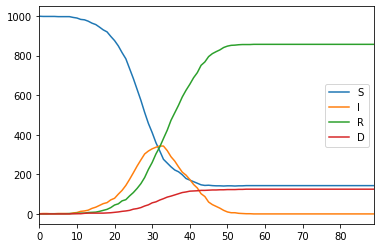

In [24]:
#print(output)
lines = output.plot.line()

In [25]:
print(output.loc[t_end-1,:]) #this is the distribution across classes after the last iteration

S    143
I      0
R    857
D    125
Name: 89, dtype: int64
